<a href="https://colab.research.google.com/github/daini10421/Assignment---R-Programming/blob/main/Assignment_R_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment - R Programming**

# **Q.1**

In [ ]:
!apt-get install r-base

Reading package lists... Done
Building dependency tree       
Reading state information... Done
r-base is already the newest version (4.3.0-1.2004.0).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


In [ ]:

if (!requireNamespace("stringi", quietly = TRUE)) {
  install.packages("stringi")
}

library(stringi)


generateRandomString <- function(length) {
  random_string <- stri_rand_strings(length, 1, pattern = "[a-zA-Z]")
  random_string
}


num_lines <- 1000
string_length <- 10
output_file <- "random_strings.txt"


random_strings <- replicate(num_lines, generateRandomString(string_length))
writeLines(random_strings, con = output_file)

cat(paste0(output_file, " created successfully!\n"))


random_strings.txt created successfully!


# **Q.2**

[1] "Number of rows with missing values: 51"
[1] "Selected columns with correlation <= 0.7:"
NULL


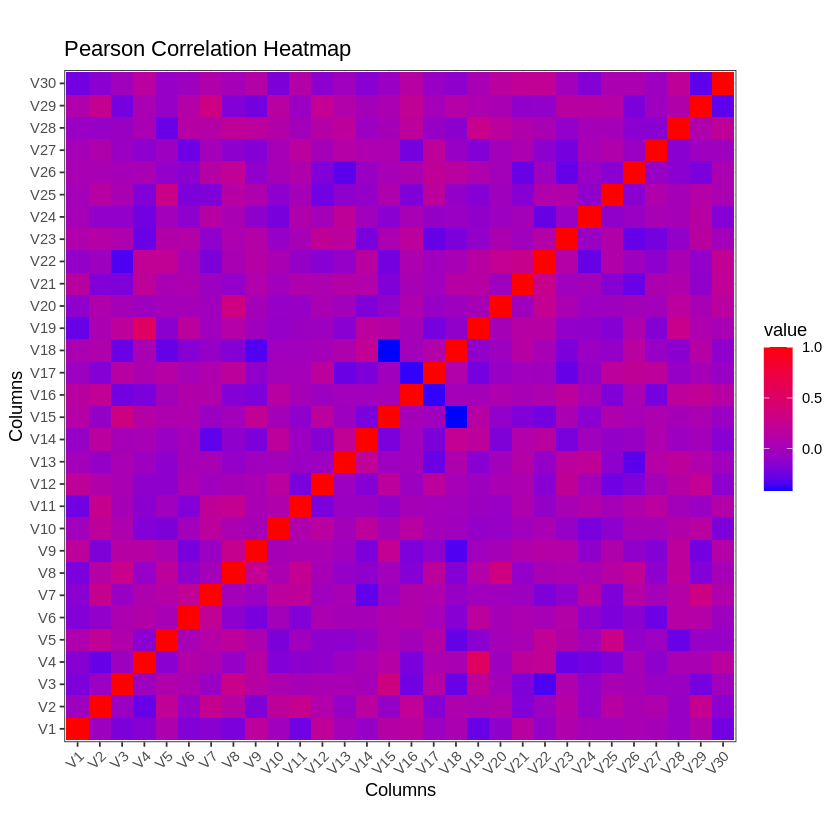

In [ ]:
library(ggplot2)
library(tidyr)

# Create a random dataset with 100 rows and 30 columns
set.seed(42)
dataset <- as.data.frame(matrix(sample(1:200, 100*30, replace=TRUE), nrow=100))

# (i) Replace values with NA in the defined range [10, 60]
dataset[11:61, ] <- NA

# Count number of rows with missing values
count_missing_rows <- sum(rowSums(is.na(dataset)) > 0)
print(paste0("Number of rows with missing values: ", count_missing_rows))

# (ii) Replace NA values with the column average
dataset <- apply(dataset, 2, function(x) { ifelse(is.na(x), mean(x, na.rm=TRUE), x) })

# (iii) Find Pearson correlation among columns and plot heatmap
correlation_matrix <- cor(dataset, use="pairwise.complete.obs")
heatmap_data <- data.frame(expand.grid(Var1 = colnames(correlation_matrix), Var2 = colnames(correlation_matrix)),
                           value = as.vector(correlation_matrix))
ggplot(heatmap_data, aes(Var2, Var1, fill = value)) +
  geom_tile() +
  scale_fill_gradient(low = "blue", high = "red") +
  labs(title = "Pearson Correlation Heatmap") +
  xlab("Columns") +
  ylab("Columns") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  coord_fixed()

# Select columns with correlation <= 0.7
selected_columns <- names(correlation_matrix)[apply(correlation_matrix, 2, function(x) { max(x) }) <= 0.7]
print("Selected columns with correlation <= 0.7:")
print(selected_columns)

# (iv) Normalize values between 0 and 10
normalized_dataset <- apply(dataset, 2, function(x) { (x - min(x)) / (max(x) - min(x)) * 10 })

# (v) Replace values with 1 if <= 0.5, else with 0
binary_dataset <- apply(normalized_dataset, 2, function(x) { ifelse(x <= 0.5, 1, 0) })


# **Q.3**

In [11]:
install.packages(c("ggplot2", "dplyr", "factoextra", "cluster"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages(c("ggplot2", "dplyr", "factoextra", "cluster")):
“installation of package ‘cluster’ had non-zero exit status”


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.
ℹ The deprecated feature was likely used in the factoextra package.
  Please report the issue at <https://github.com/kassambara/factoextra/issues>.”


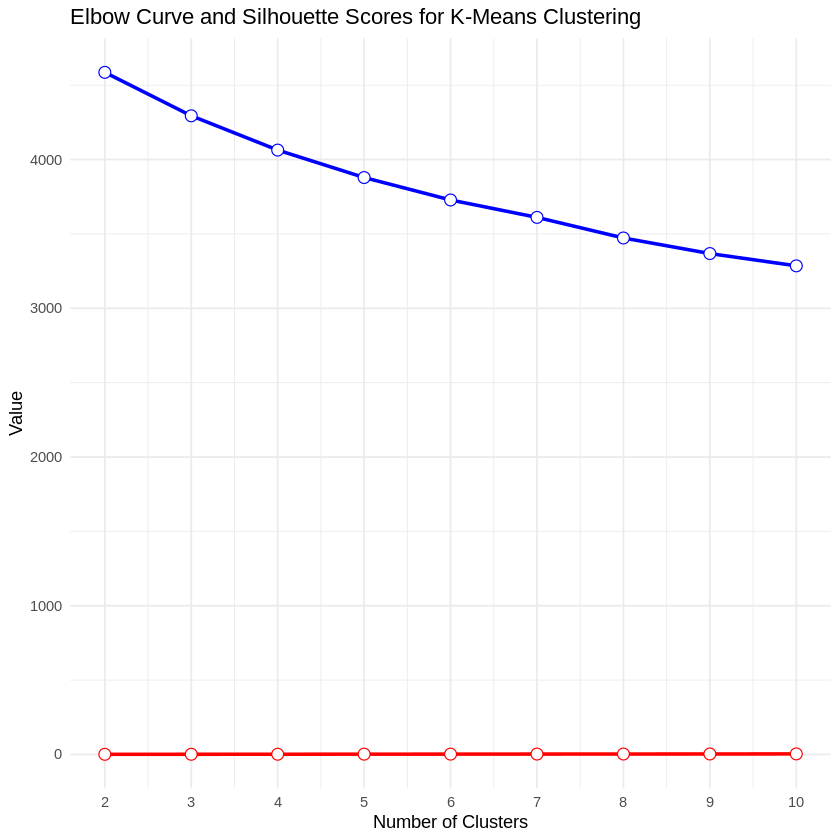

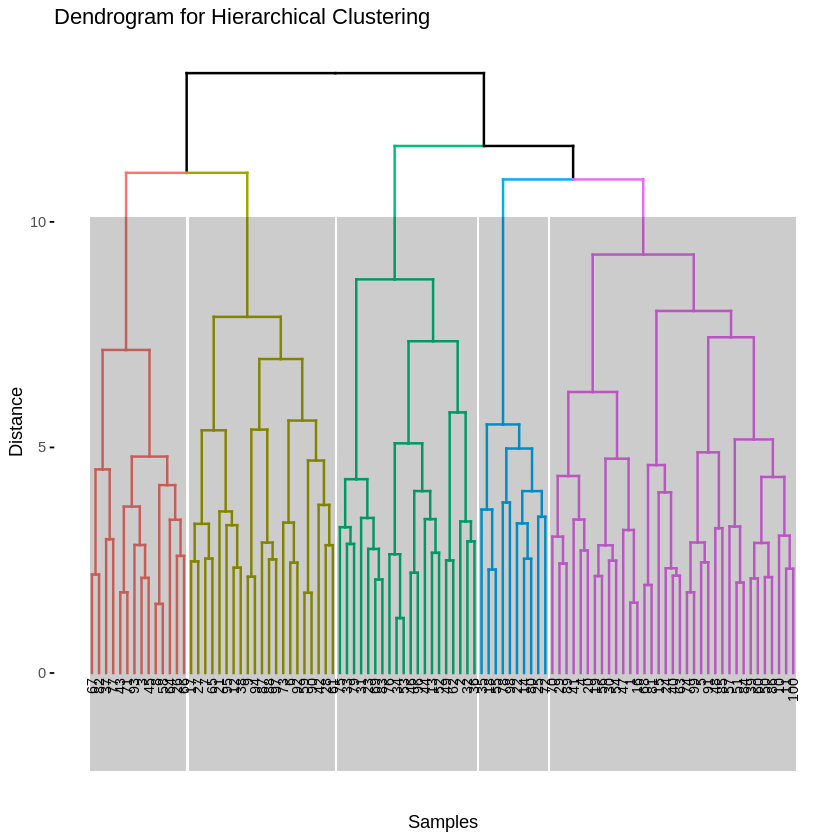

In [14]:
library(ggplot2)
library(factoextra)
library(cluster)

set.seed(42)
dataset <- data.frame(matrix(runif(2000, -10, 10), ncol=4))
colnames(dataset) <- c('Column1', 'Column2', 'Column3', 'Column4')
dataset <- cbind(dataset, data.frame(matrix(runif(2000, 10, 20), ncol=4)))
dataset <- cbind(dataset, data.frame(matrix(runif(1000, -100, 100), ncol=2)))

scaled_dataset <- scale(dataset)

inertia_values <- vector()
silhouette_scores <- vector()
max_clusters <- 10

for (n_clusters in 2:max_clusters) {
  kmeans_result <- kmeans(scaled_dataset, centers = n_clusters, nstart = 25)
  inertia_values <- c(inertia_values, kmeans_result$tot.withinss)

  # Calculate silhouette score using cluster assignments
  silhouette_scores <- c(silhouette_scores, mean(silhouette(kmeans_result$cluster, dist(scaled_dataset))))
}

plt <- ggplot(data.frame(inertia_values, silhouette_scores), aes(x = 2:max_clusters)) +
  geom_line(aes(y = inertia_values), color = 'blue', size = 1, linetype = 'solid') +
  geom_point(aes(y = inertia_values), color = 'blue', size = 3, shape = 21, fill = 'white') +
  geom_line(aes(y = silhouette_scores), color = 'red', size = 1, linetype = 'solid') +
  geom_point(aes(y = silhouette_scores), color = 'red', size = 3, shape = 21, fill = 'white') +
  scale_x_continuous(breaks = seq(2, max_clusters, by = 1)) +
  labs(x = 'Number of Clusters', y = 'Value', color = 'Legend', title = 'Elbow Curve and Silhouette Scores for K-Means Clustering') +
  theme_minimal()
print(plt)


dendrogram_data <- scaled_dataset[1:100, ]

linkage_matrix <- hclust(dist(dendrogram_data), method = 'ward.D2')

plt <- fviz_dend(linkage_matrix, k = 5, cex = 0.6, rect = TRUE, rect_fill = TRUE,
                 rect_border = 'black', rect_fill_alpha = 0.4, label_col = 'black',
                 xlab = 'Samples', ylab = 'Distance', main = 'Dendrogram for Hierarchical Clustering')
print(plt)


# **Q.4**

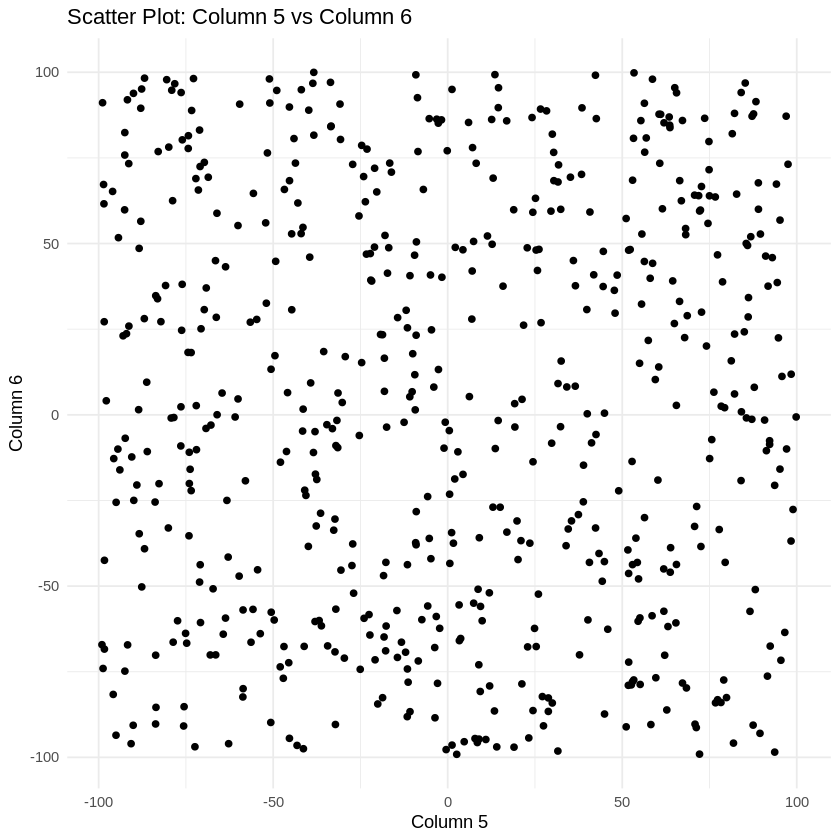

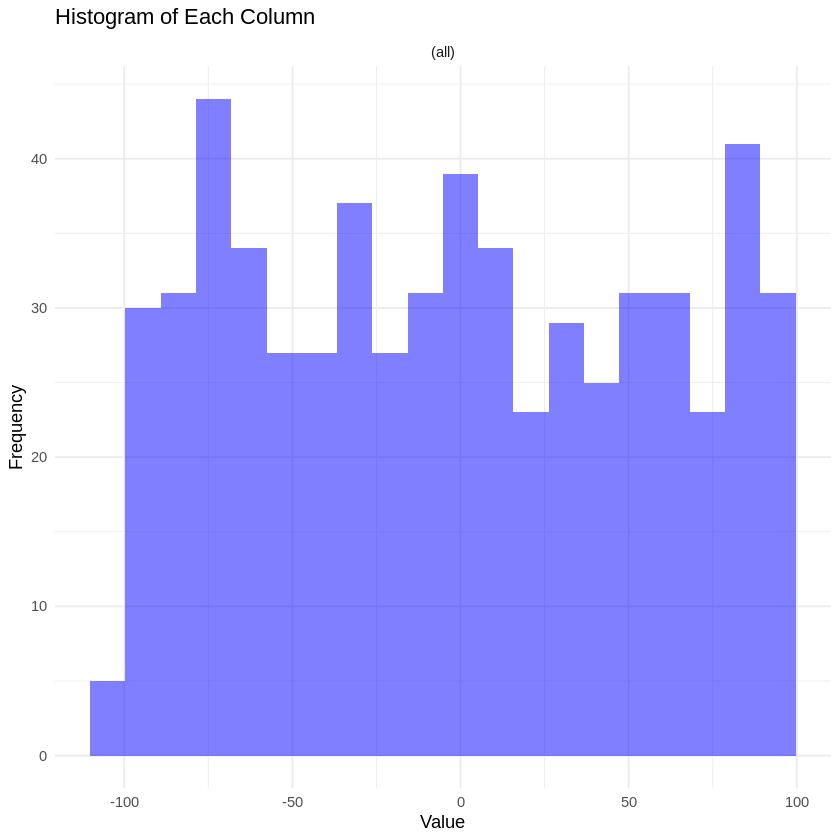

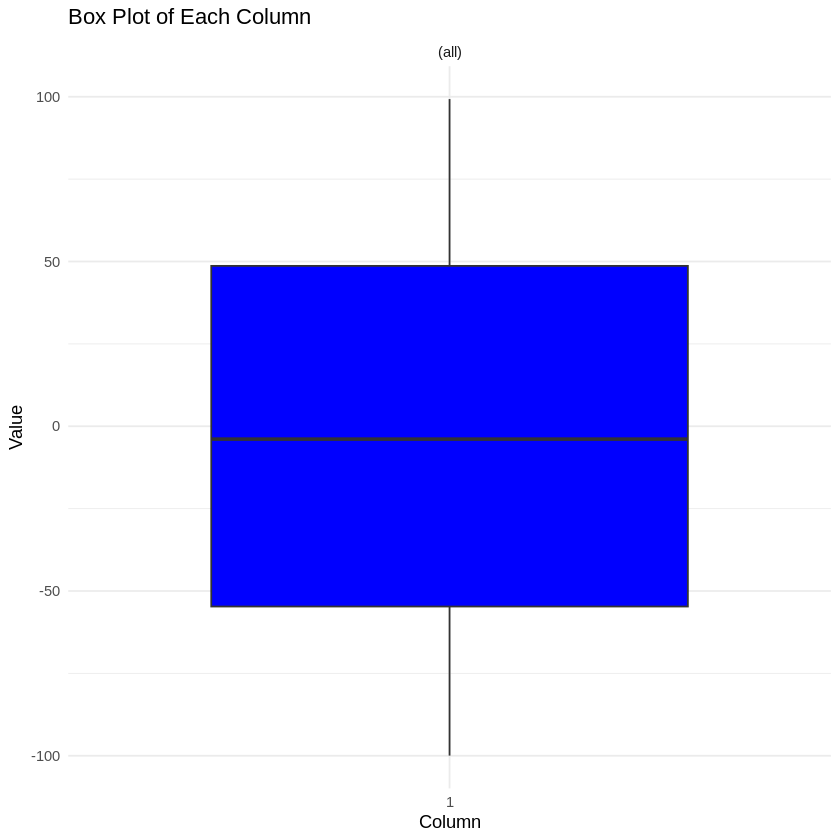

In [16]:
library(ggplot2)

set.seed(42)
dataset <- matrix(runif(9000, -100, 100), ncol = 15)

column5 <- dataset[, 5]
column6 <- dataset[, 6]
# Scatter plot

plt <- ggplot(data.frame(column5 = column5, column6 = column6), aes(x = column5, y = column6)) +
geom_point() +
labs(x = 'Column 5', y = 'Column 6', title = 'Scatter Plot: Column 5 vs Column 6') +
theme_minimal()
print(plt)
# Histograms

plt <- ggplot(data = as.data.frame(dataset)) +
geom_histogram(aes(x = V1), bins = 20, alpha = 0.5, fill = 'blue') +
facet_wrap(~., scales = 'free') +
labs(x = 'Value', y = 'Frequency', title = 'Histogram of Each Column') +
theme_minimal()
print(plt)
# Box plots

plt <- ggplot(data = as.data.frame(dataset)) +
geom_boxplot(aes(x = factor(1), y = V1), fill = 'blue') +
facet_wrap(~., scales = 'free') +
labs(x = 'Column', y = 'Value', title = 'Box Plot of Each Column') +
theme_minimal()
print(plt)

# **Q.5**

In [17]:
library(ggplot2)

set.seed(42)
dataset <- matrix(runif(2500, 5, 10), ncol = 5)

for (i in 1:5) {
col <- dataset[, i]
t_result <- t.test(col, mu = 7.5)
print(paste0("t-Test on Column ", i, ": t-statistic =", t_result$statistic, ", p-value =", t_result$p.value))
}

for (i in 1:5) {
col <- dataset[, i]
wilcox_result <- wilcox.test(col - 7.5)
print(paste0("Wilcoxon Signed Rank Test on Column ", i, ": test statistic =", wilcox_result$statistic, ", p-value =", wilcox_result$p.value))
}

col3 <- dataset[, 3]
col4 <- dataset[, 4]

t_result <- t.test(col3, col4)
print(paste0("Two Sample t-Test on Column 3 and Column 4: t-statistic =", t_result$statistic, ", p-value =", t_result$p.value))

wilcox_result <- wilcox.test(col3, col4)
print(paste0("Wilcoxon Rank Sum Test on Column 3 and Column 4: test statistic =", wilcox_result$statistic, ", p-value =", wilcox_result$p.value))

[1] "t-Test on Column 1: t-statistic =-0.79584379356682, p-value =0.426501254339723"
[1] "t-Test on Column 2: t-statistic =-1.00663646874216, p-value =0.314597375431771"
[1] "t-Test on Column 3: t-statistic =-0.898699212402837, p-value =0.36924633591744"
[1] "t-Test on Column 4: t-statistic =0.418155014270148, p-value =0.676013673544154"
[1] "t-Test on Column 5: t-statistic =1.24819209134471, p-value =0.212546066974526"
[1] "Wilcoxon Signed Rank Test on Column 1: test statistic =60031, p-value =0.42234292838068"
[1] "Wilcoxon Signed Rank Test on Column 2: test statistic =59419, p-value =0.321343684926198"
[1] "Wilcoxon Signed Rank Test on Column 3: test statistic =59720, p-value =0.368877132588002"
[1] "Wilcoxon Signed Rank Test on Column 4: test statistic =63755, p-value =0.726760013255348"
[1] "Wilcoxon Signed Rank Test on Column 5: test statistic =66503, p-value =0.230294655294293"
[1] "Two Sample t-Test on Column 3 and Column 4: t-statistic =-0.923235853362581, p-value =0.356107914